In [1]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


# 3차원 이미지 : 용적 데이터
- CT 스캔 데이터
- 머리에서 발끝까지 축으로 하는 연속된 단층 이미지가 있고 각 이미지는 신체 단면을 촬영한 것
- CT 스캔은 밀도가 높아지는 차례대로 폐, 지방층, 수분, 근육, 뼈같은 신체부위 구별 가능
- 흑백 이미지처럼 하나의 밀도 채널만 존재
- N X C X D X H X W의 5차원 텐서가 됨(배치, 채널, 깊이, 높이, 넓이)

In [6]:
import numpy as np
import torch
torch.set_printoptions(edgeitems=2, threshold=50)

In [2]:
%cd /content/gdrive/MyDrive/Pytorch_deep_learning_master/data/p1ch4

/content/gdrive/MyDrive/Pytorch_deep_learning_master/data/p1ch4


In [4]:
import imageio

dir_path = "/content/gdrive/MyDrive/Pytorch_deep_learning_master/data/p1ch4/volumetric-dicom/2-LUNG 3.0  B70f-04083"
vol_arr = imageio.volread(dir_path, 'DICOM')
vol_arr.shape

Reading DICOM (examining files): 1/99 files (1.0%)2/99 files (2.0%)3/99 files (3.0%)4/99 files (4.0%)5/99 files (5.1%)6/99 files (6.1%)7/99 files (7.1%)8/99 files (8.1%)9/99 files (9.1%)10/99 files (10.1%)11/99 files (11.1%)12/99 files (12.1%)13/99 files (13.1%)14/99 files (14.1%)15/99 files (15.2%)16/99 files (16.2%)17/99 files (17.2%)18/99 files (18.2%)19/99 files (19.2%)20/99 files (20.2%)21/99 files (21.2%)22/99 files (22.2%)23/99 files (23.2%)24/99 files (24.2%)25/99 files (25.3%)26/99 files (26.3%)27/99 files (27

(99, 512, 512)

In [7]:
vol = torch.from_numpy(vol_arr).float()
vol = torch.unsqueeze(vol, 0)

vol.shape

torch.Size([1, 99, 512, 512])

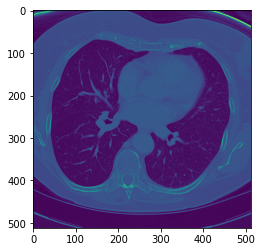

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.imshow(vol_arr[50])

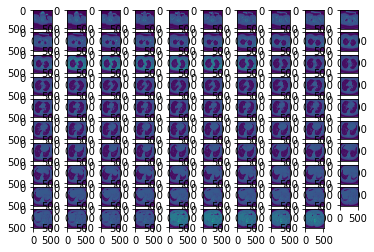

<Figure size 720x576 with 0 Axes>

In [25]:
fig = plt.figure()
plt.figure(figsize = (10, 8))
for i in range(len(vol_arr)):
    ax = fig.add_subplot(10,10,i+1)
    ax.imshow(vol_arr[i])
